# DNN - MNIST (Trial 2)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

## Preprocessing

In [ ]:
# the data, shuffled and split between train and test sets
(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = mnist.load_data()

In [ ]:
input_dim = 784 # 28*28
X_train = X_train_pre.reshape(X_train_pre.shape[0], input_dim)
X_test = X_test_pre.reshape(X_test_pre.shape[0], input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

print('training data shape:', X_train.shape)
print('{} train samples, {} test samples'.format(X_train.shape[0], X_test.shape[0]))

training data shape: (60000, 784)
60000 train samples, 10000 test samples


In [ ]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)

In [ ]:
validation_split = 0.166667
index = np.random.permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]


## The models

### Build the model **1**

In [ ]:
#from keras.layers import Dropout

model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(15, activation='relu'))   #hidden layers
model.add(layers.Dense(10, activation='softmax'))    #output layers
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(0.001),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 15)                  │          11,775 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,935 (46.62 KB)

 Trainable params: 11,935 (46.62 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0856 - loss: 2.3368 - val_accuracy: 0.1417 - val_loss: 2.2486
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1639 - loss: 2.2254 - val_accuracy: 0.2199 - val_loss: 2.1630
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2467 - loss: 2.1357 - val_accuracy: 0.2921 - val_loss: 2.0848
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3145 - loss: 2.0587 - val_accuracy: 0.3545 - val_loss: 2.0110
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3723 - loss: 1.9864 - val_accuracy: 0.4018 - val_loss: 1.9406
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4205 - loss: 1.9125 - val_accuracy: 0.4416 - val_loss: 1.8735
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4567 - loss: 1.8492 - val_accuracy: 0.4761 - val_loss: 1.8097
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4869 - loss: 1.7900 - val_accuracy: 0.

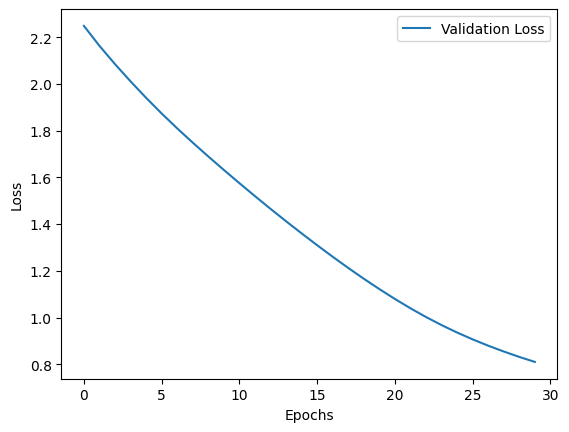

In [ ]:
EPOCHS = 30

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    batch_size=256, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])


import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 82.26%


### Build the model **2**

In [ ]:
#from keras.layers import Dropout

model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(0.0005),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5294 - loss: 1.6380 - val_accuracy: 0.8380 - val_loss: 0.6779
Epoch 2/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8567 - loss: 0.5928 - val_accuracy: 0.8792 - val_loss: 0.4598
Epoch 3/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8873 - loss: 0.4246 - val_accuracy: 0.8931 - val_loss: 0.3939
Epoch 4/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8988 - loss: 0.3705 - val_accuracy: 0.8988 - val_loss: 0.3628
Epoch 5/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9034 - loss: 0.3457 - val_accuracy: 0.9034 - val_loss: 0.3445
Epoch 6/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9077 - loss: 0.3303 - val_accuracy: 0.9064 - val_loss: 0.3325
Epoch 7/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9122 - loss: 0.3189 - val_accuracy: 0.9086 - val_loss: 0.3237
Epoch 8/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9156 - loss: 0.3009 - val_accuracy: 0.

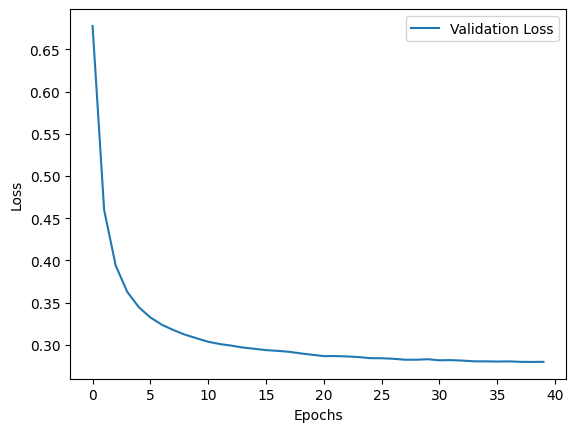

In [ ]:
EPOCHS = 40

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    batch_size=256, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 92.66%


### Build the model **3**

In [ ]:
#from keras.layers import Dropout

model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(10, activation='sigmoid'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7554 - loss: 0.9385 - val_accuracy: 0.8993 - val_loss: 0.3767
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9041 - loss: 0.3489 - val_accuracy: 0.9087 - val_loss: 0.3236
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9126 - loss: 0.3085 - val_accuracy: 0.9138 - val_loss: 0.3064
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9178 - loss: 0.2929 - val_accuracy: 0.9186 - val_loss: 0.2954
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9228 - loss: 0.2793 - val_accuracy: 0.9186 - val_loss: 0.2910
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9242 - loss: 0.2654 - val_accuracy: 0.9178 - val_loss: 0.2912
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9258 - loss: 0.2613 - val_accuracy: 0.9199 - val_loss: 0.2848
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9279 - loss: 0.2617 - val_accuracy: 0.

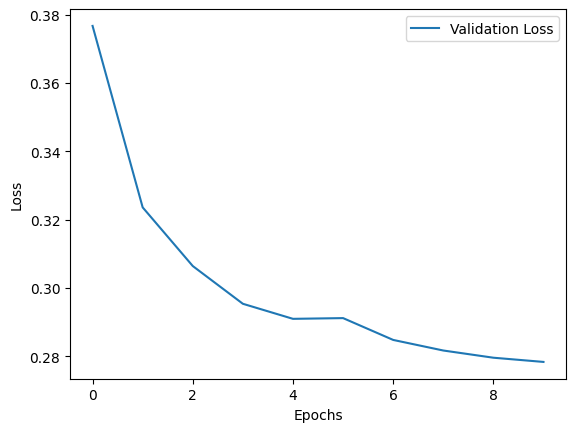

In [ ]:
EPOCHS = 10

history = model.fit(X_train, y_train,
                    batch_size=64, epochs=EPOCHS,
                    validation_data=(X_val, y_val))

import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 92.62%


**Collect the Performances**
> Ranked by highest accuracy

1. 92.66%
- Activation Function: softmax
- Optimizer(Learning Rate): RMSprop(0.0005)
- EPOCHS: 40 with Early Stopping
- Batch Size: 256

2. 92.62%
- Activation Function: sigmoid
- Optimizer(Learning Rate): Adam(0.001)
- EPOCHS: 10
- Batch Size: 64

3. 82.26%
- Activation Function(Hidden Layers): relu
- Activation Function(Output): softmax
- Optimizer(Learning Rate): SGD(0.001)
- EPOCHS: 30 with Early Stopping
- Batch Size: 256


**Comparison & Recommendations for Hyperparameter Tuning**
1.	The optimizer is likely to have a greater impact on accuracy than the activation function. The number of epochs did not significantly affect accuracy, likely because the MNIST problem has a simple structure rather than a complex one.

2. For multi-class classification in MNIST, `softmax` is the appropriate activation function for the output layer, as it provides a probability distribution over the 10 classes. In hidden layers, `ReLU` is generally more effective, though self-normalizing activation functions like `selu` can also be considered.

3.	When adding `ReLU` to hidden layers, increasing the number of neurons can enhance model capacity. However, rather than simply adding a small number of neurons, a deeper architecture like [128, 64] combined with batch normalization or dropout is more effective in preventing overfitting and stabilizing training.

4.	`Adam` and `RMSprop` generally perform better than standard `SGD` for optimizing MNIST models, as they adjust learning rates dynamically. A lower learning rate can lead to a more stable and fine-tuned model, though it may slow convergence. Using learning rate scheduling (ex.`ReduceLROnPlateau`) can further optimize training.

5.	Early stopping and monitoring `validation loss` are crucial for preventing overfitting and optimizing training. Visualizing `val_loss` trends helps in determining when to stop training and whether the model is overfitting or underfitting.